# First Submission Project: Predictive Analysis of Airline Passenger Satisfaction

- Name:  Dzulfikri Adjmal
- Email: dzulfikriadjmal@gmail.com
- ID Dicoding: dzulfikriadjmal

## Import Library

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')


## Load Data

In [2]:
train_data = pd.read_csv('airline-passenger-satisfaction/train.csv', index_col=0)
test_data = pd.read_csv('airline-passenger-satisfaction/test.csv', index_col=0)

## Data Preprocessing

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int64  


In [5]:
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
test_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
train_data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
test_data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


### Check Null Value

In [10]:
print("Null values in train data: ")
print(train_data.isna().sum()[train_data.isna().sum() > 0], "\n")
print("Null values in test data: ")
print(test_data.isna().sum()[test_data.isna().sum() > 0])

Null values in train data: 
Arrival Delay in Minutes    310
dtype: int64 

Null values in test data: 
Arrival Delay in Minutes    83
dtype: int64


Terdapat missing value pada dataset, sehingga perlu dilakukan penanganan missing value. Pada data train terdapat missing value pada kolom `Arrival Delay in Minutes` dengan jumlah sebanyak 310, sedangkan pada data test di kolom yang sama terdapat 83 missing value. Jumlah missing value pada kedua dataset tidak terlalu banyak, sehingga dapat dilakukan penghapusan missing value.

### Check Duplicate Value

In [11]:
print("Duplicated value in train data: ", train_data.duplicated().sum())
print("Duplicated value in test data: ", test_data.duplicated().sum())

Duplicated value in train data:  0
Duplicated value in test data:  0


### Check Outlier Value

In [12]:
exclude_features = ['id', 'satisfaction']
numerical_features = train_data[train_data.columns.difference(exclude_features)].select_dtypes(include=[np.number]).columns
categorical_features = train_data.select_dtypes(include='object').columns

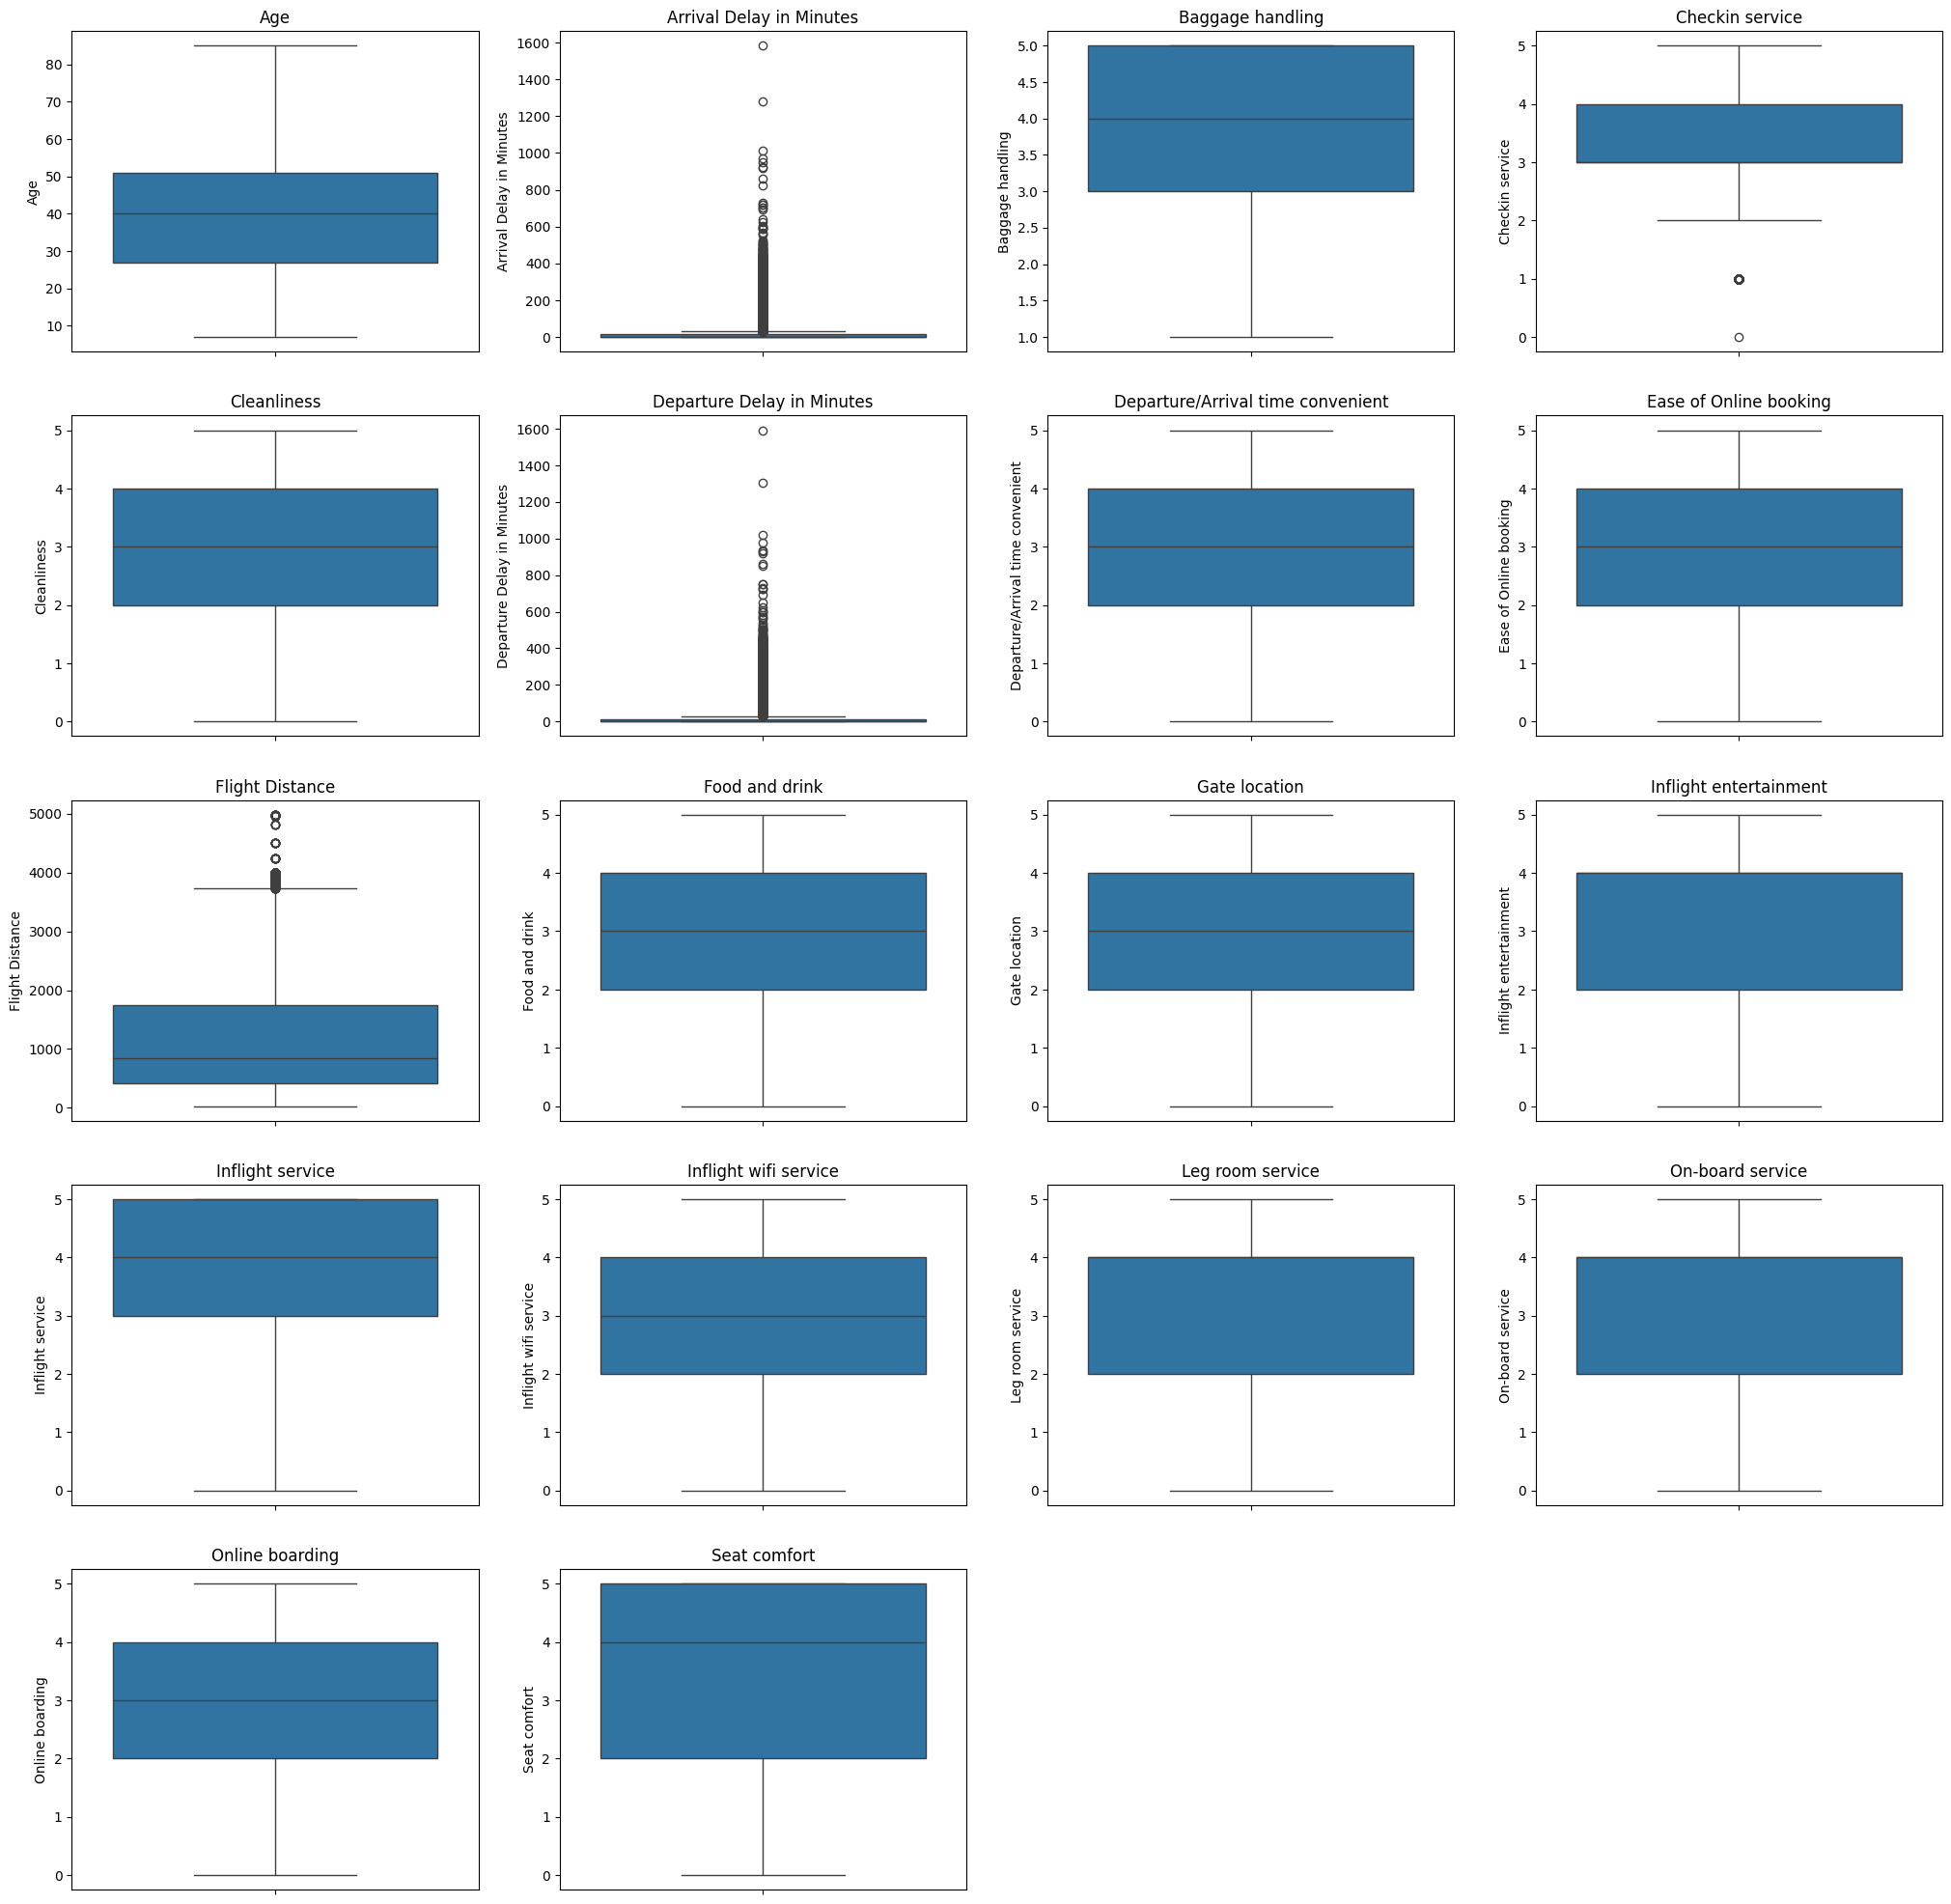

In [13]:
plt.figure(figsize=(25, 25))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(train_data[feature], orient='v' )
    plt.title(feature)
plt.show()


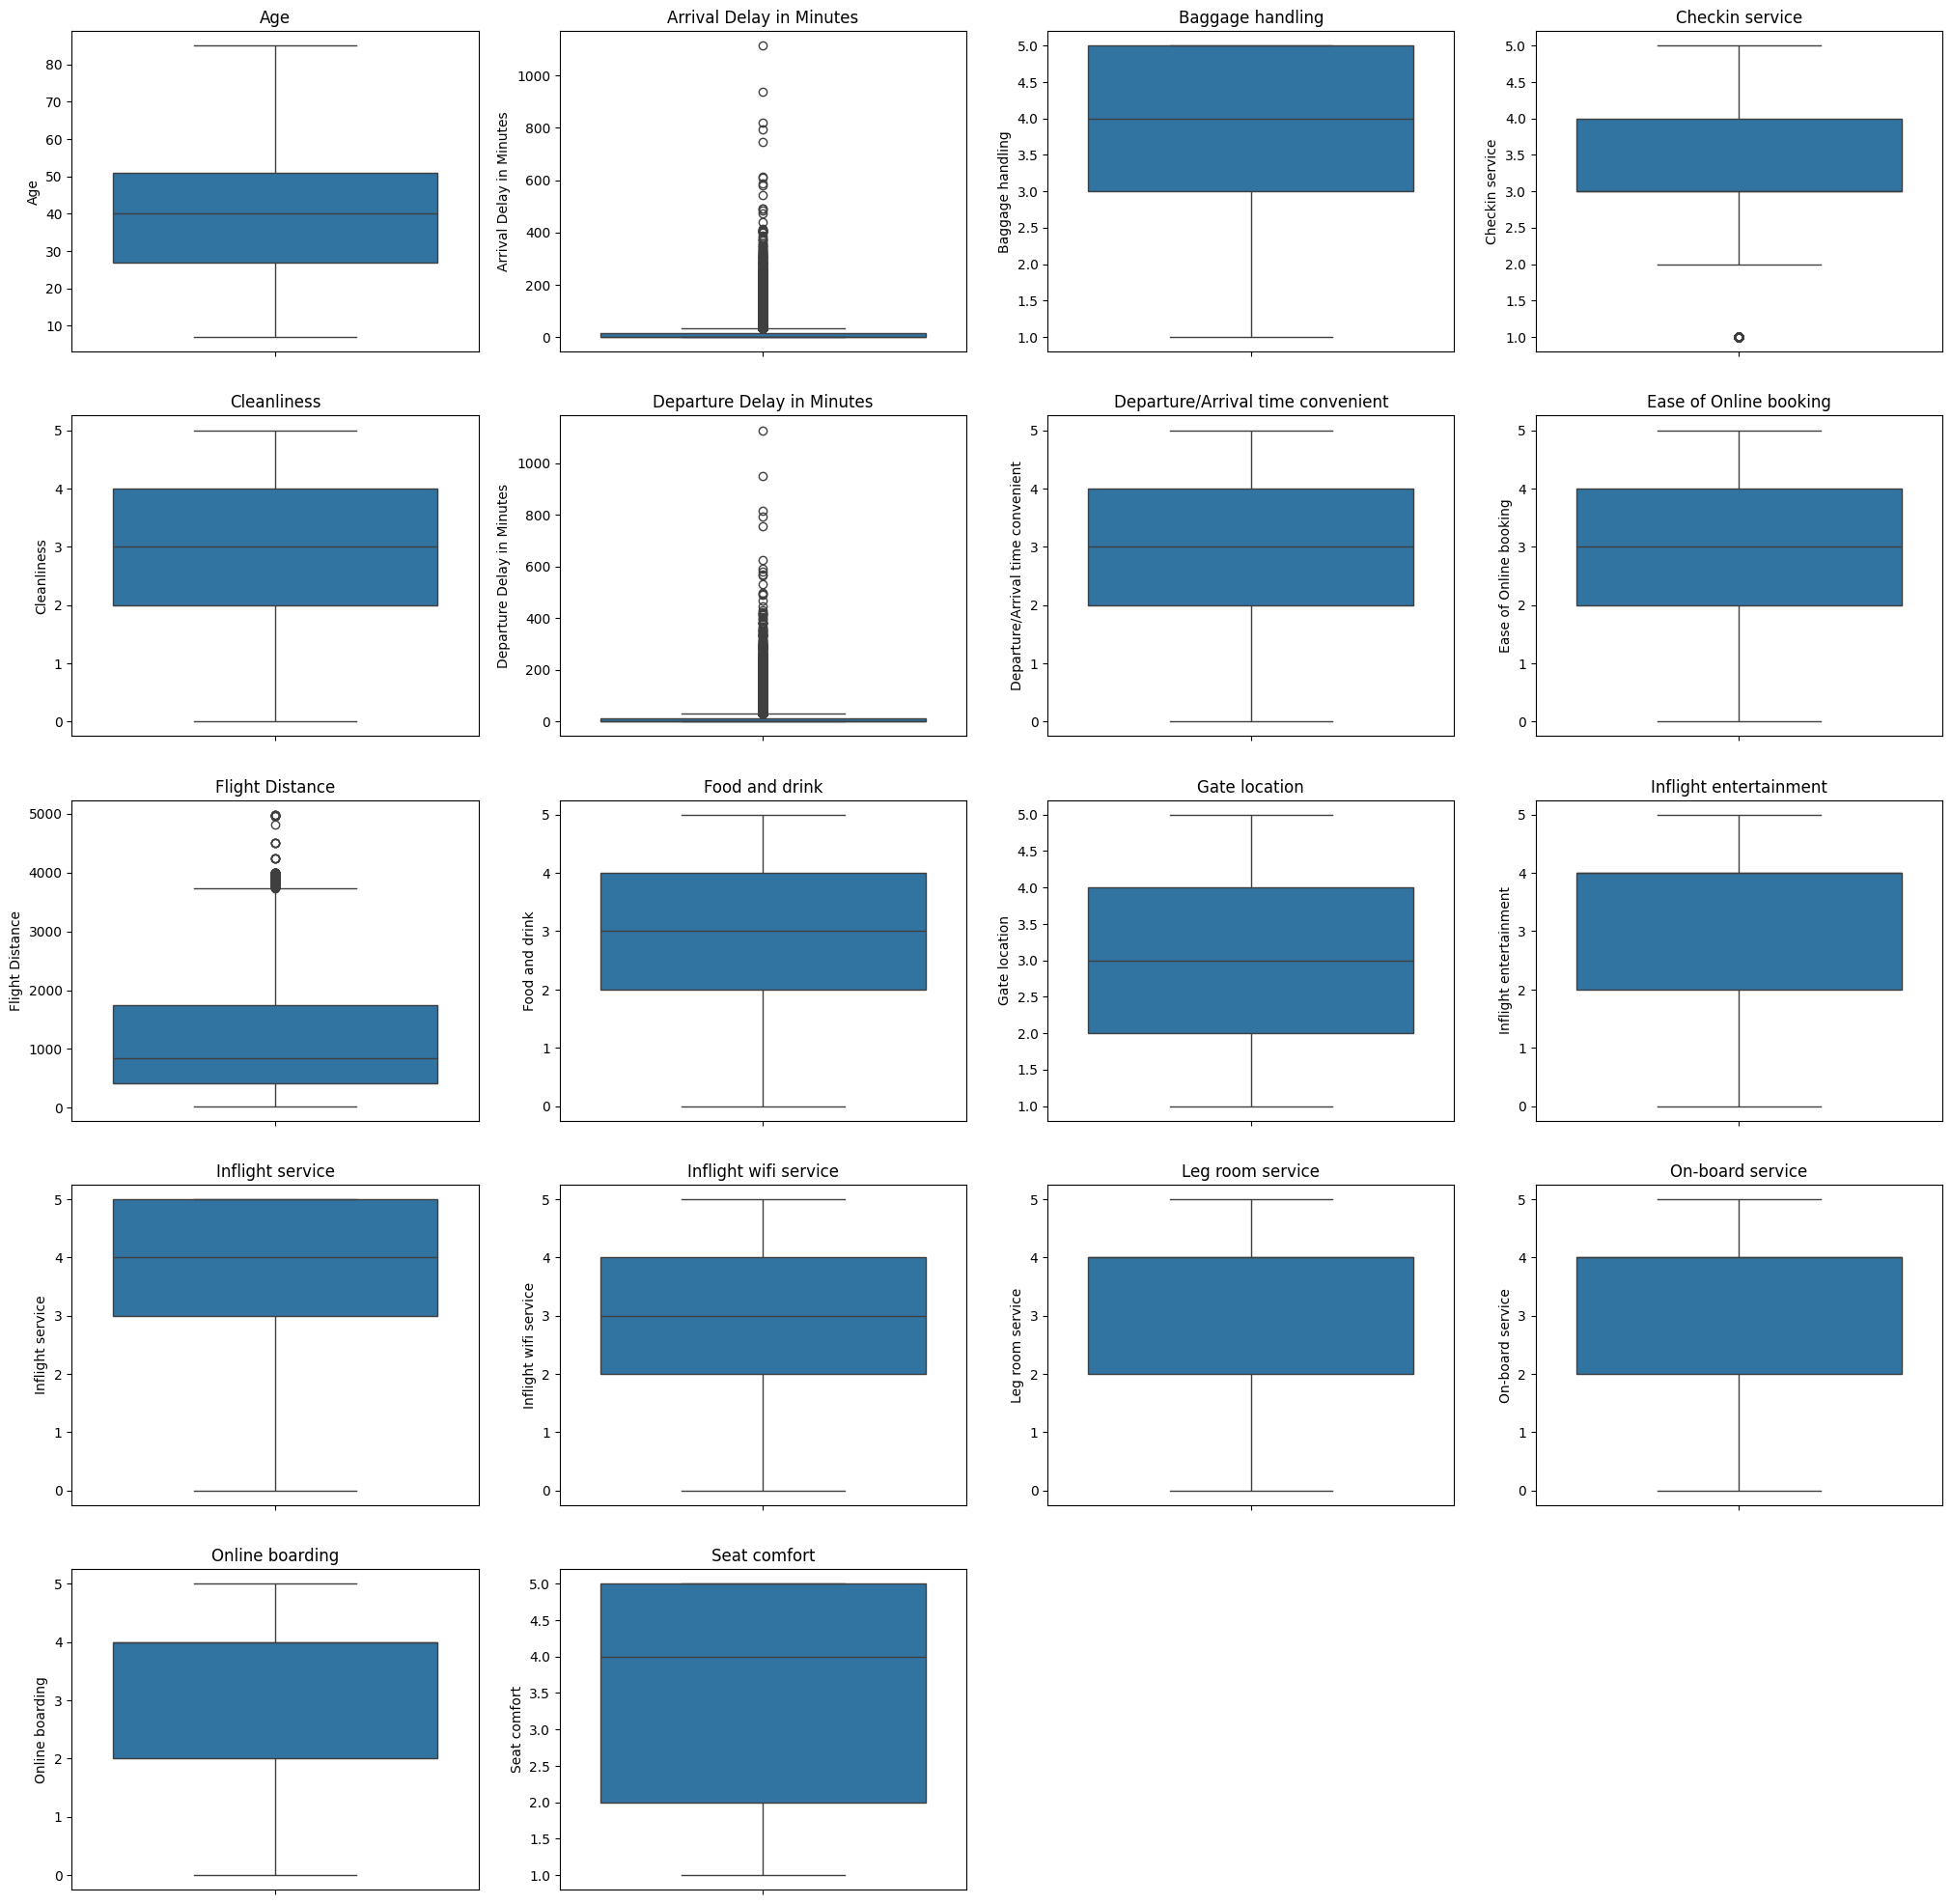

In [14]:
plt.figure(figsize=(25, 25))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(test_data[feature])
    plt.title(feature)
plt.show()

## Data Cleaning

In [15]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [16]:
print("Null values in train data: ")
print(train_data.isna().sum()[train_data.isna().sum() > 0], "\n")
print("Null values in test data: ")
print(test_data.isna().sum()[test_data.isna().sum() > 0])

Null values in train data: 
Series([], dtype: int64) 

Null values in test data: 
Series([], dtype: int64)


In [17]:
outlier_column = [
    "Departure Delay in Minutes",
    "Arrival Delay in Minutes",
]

for column in outlier_column:
    train_data[column] = np.log(train_data[column] + 1)


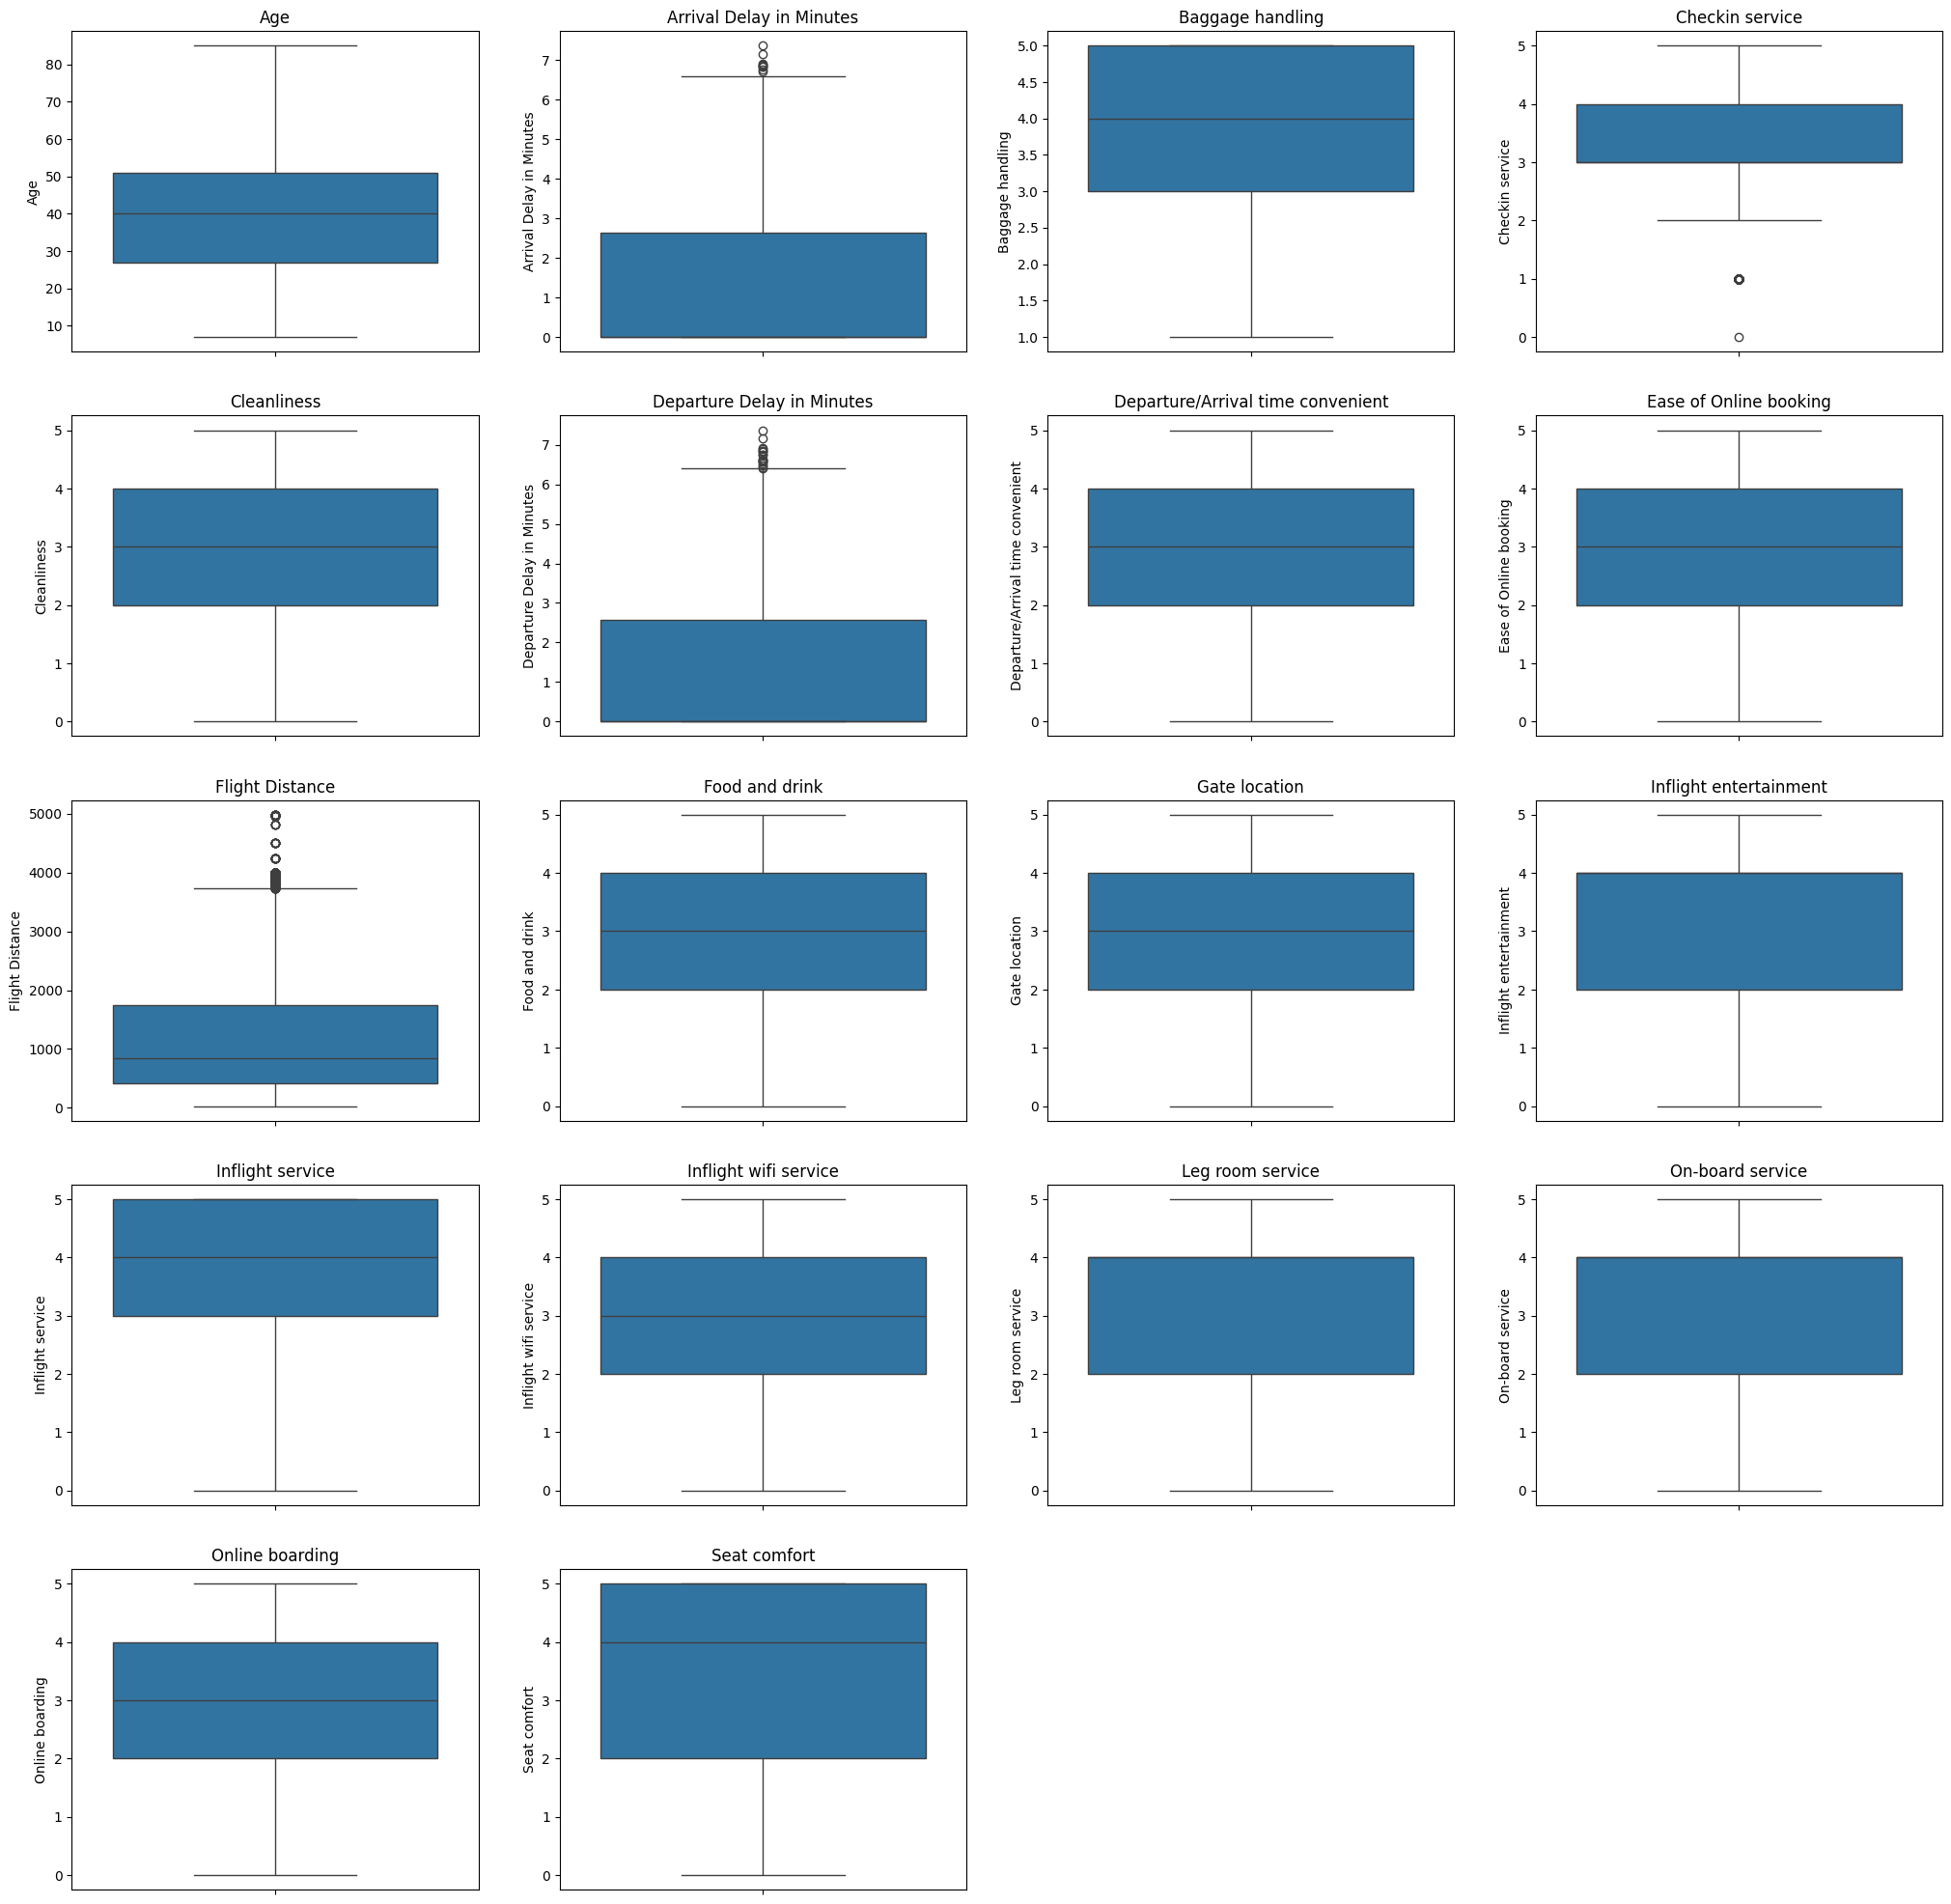

In [18]:
plt.figure(figsize=(25, 25))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(train_data[feature], orient="v")
    plt.title(feature)
plt.show()


In [19]:
outlier_column = [
    "Departure Delay in Minutes",
    "Arrival Delay in Minutes",
]

for column in outlier_column:
    test_data[column] = np.log(test_data[column] + 1)


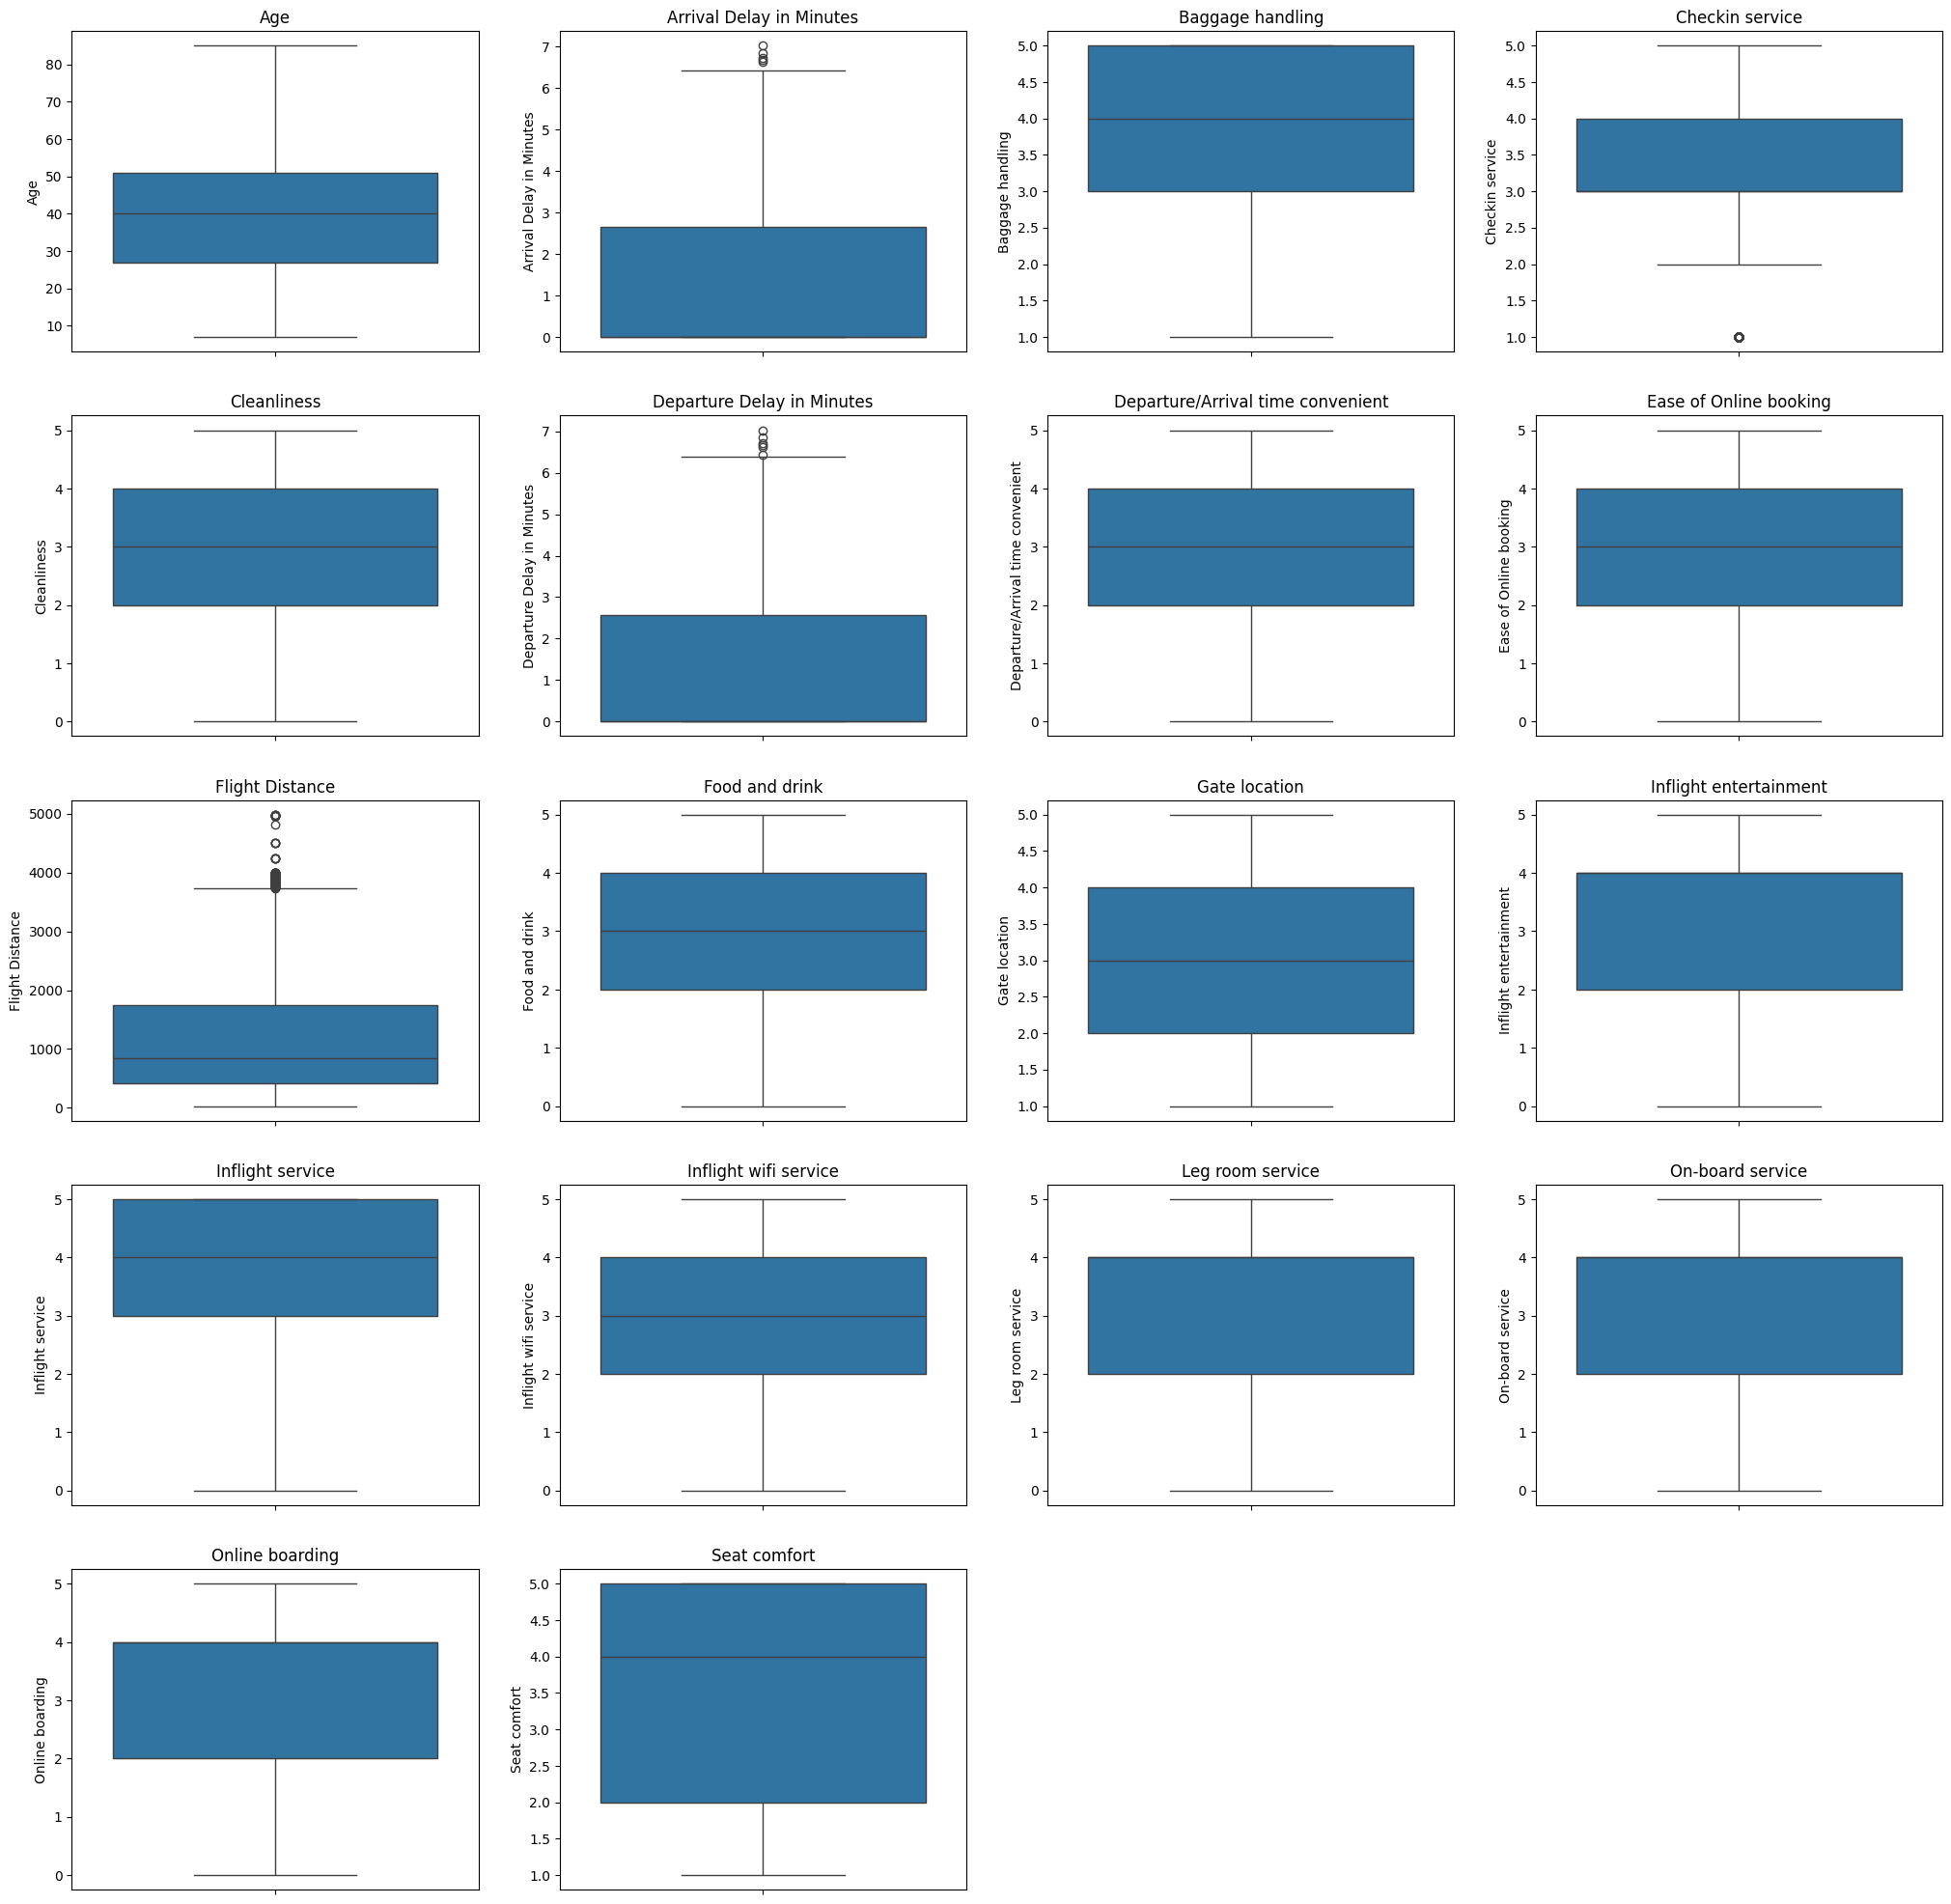

In [20]:
plt.figure(figsize=(25, 25))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(test_data[feature])
    plt.title(feature)
plt.show()


## EDA (Exploratory Data Analysis)

<Figure size 2500x2500 with 0 Axes>

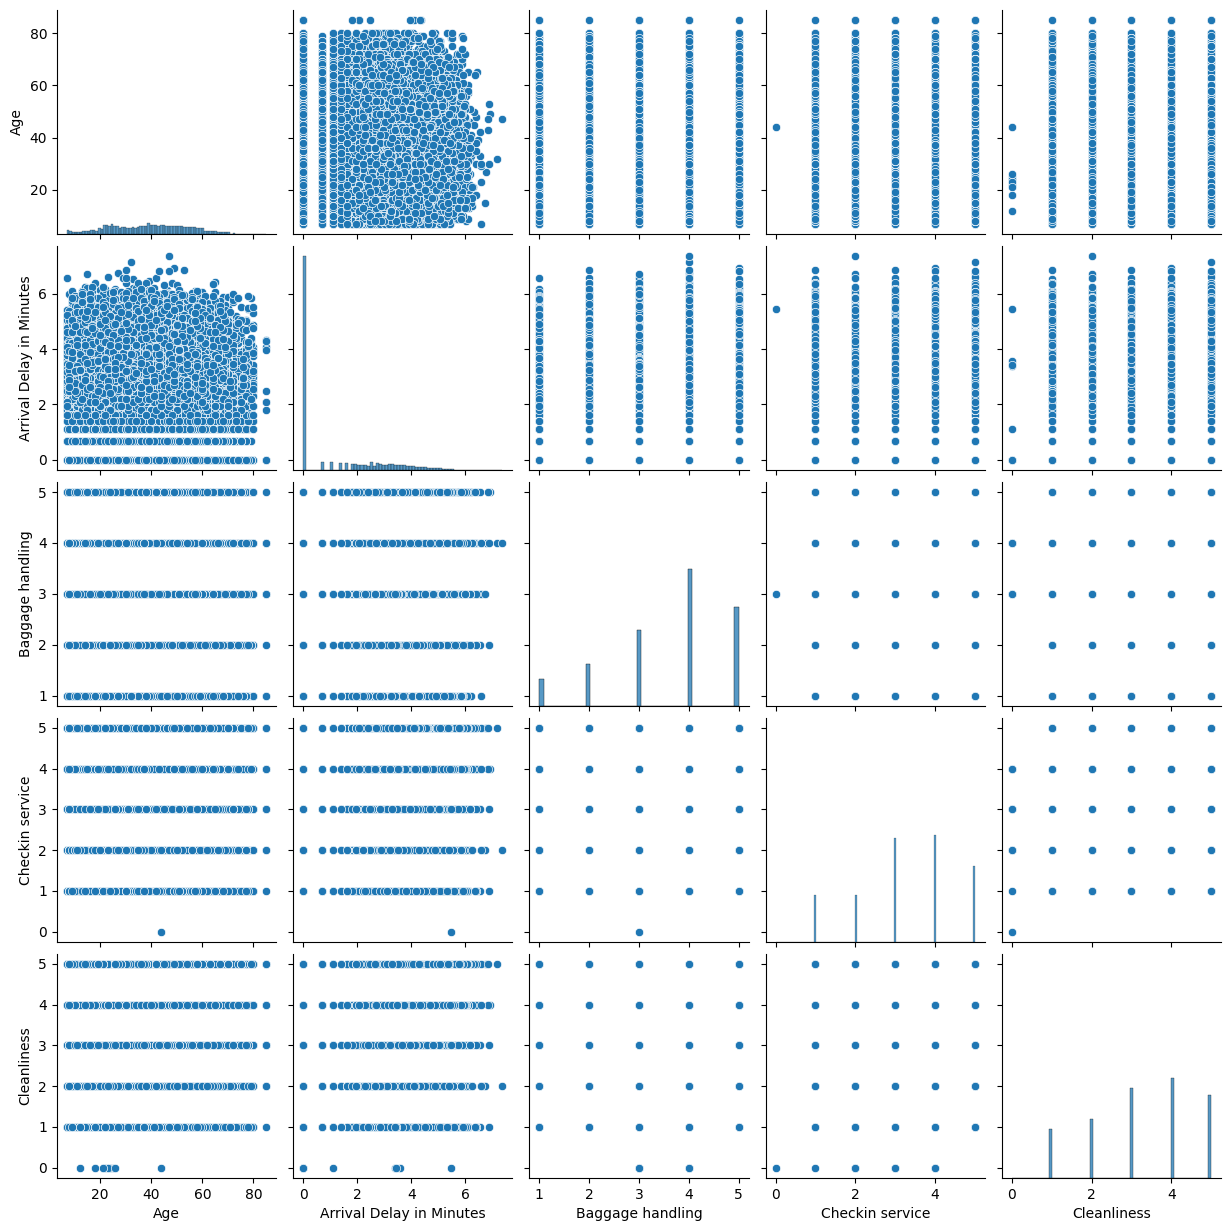

In [21]:
plt.figure(figsize=(25, 25))
sns.pairplot(train_data[numerical_features[:5]])
plt.show()

<Figure size 2500x2500 with 0 Axes>

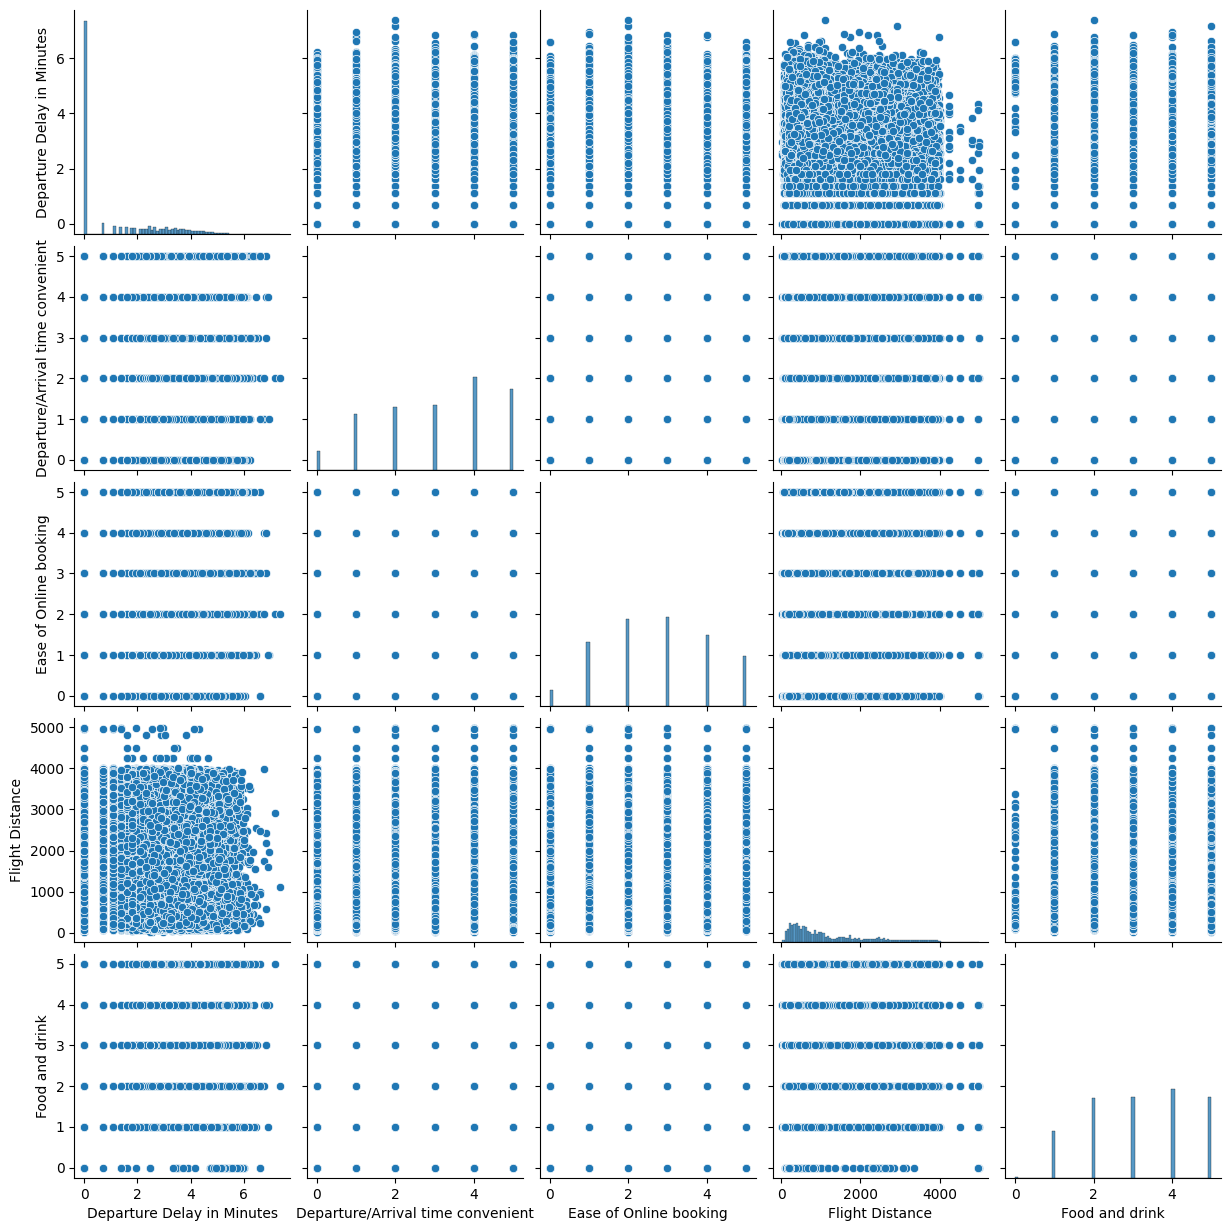

In [22]:
plt.figure(figsize=(25, 25))
sns.pairplot(train_data[numerical_features[5:10]])
plt.show()


<Figure size 2500x2500 with 0 Axes>

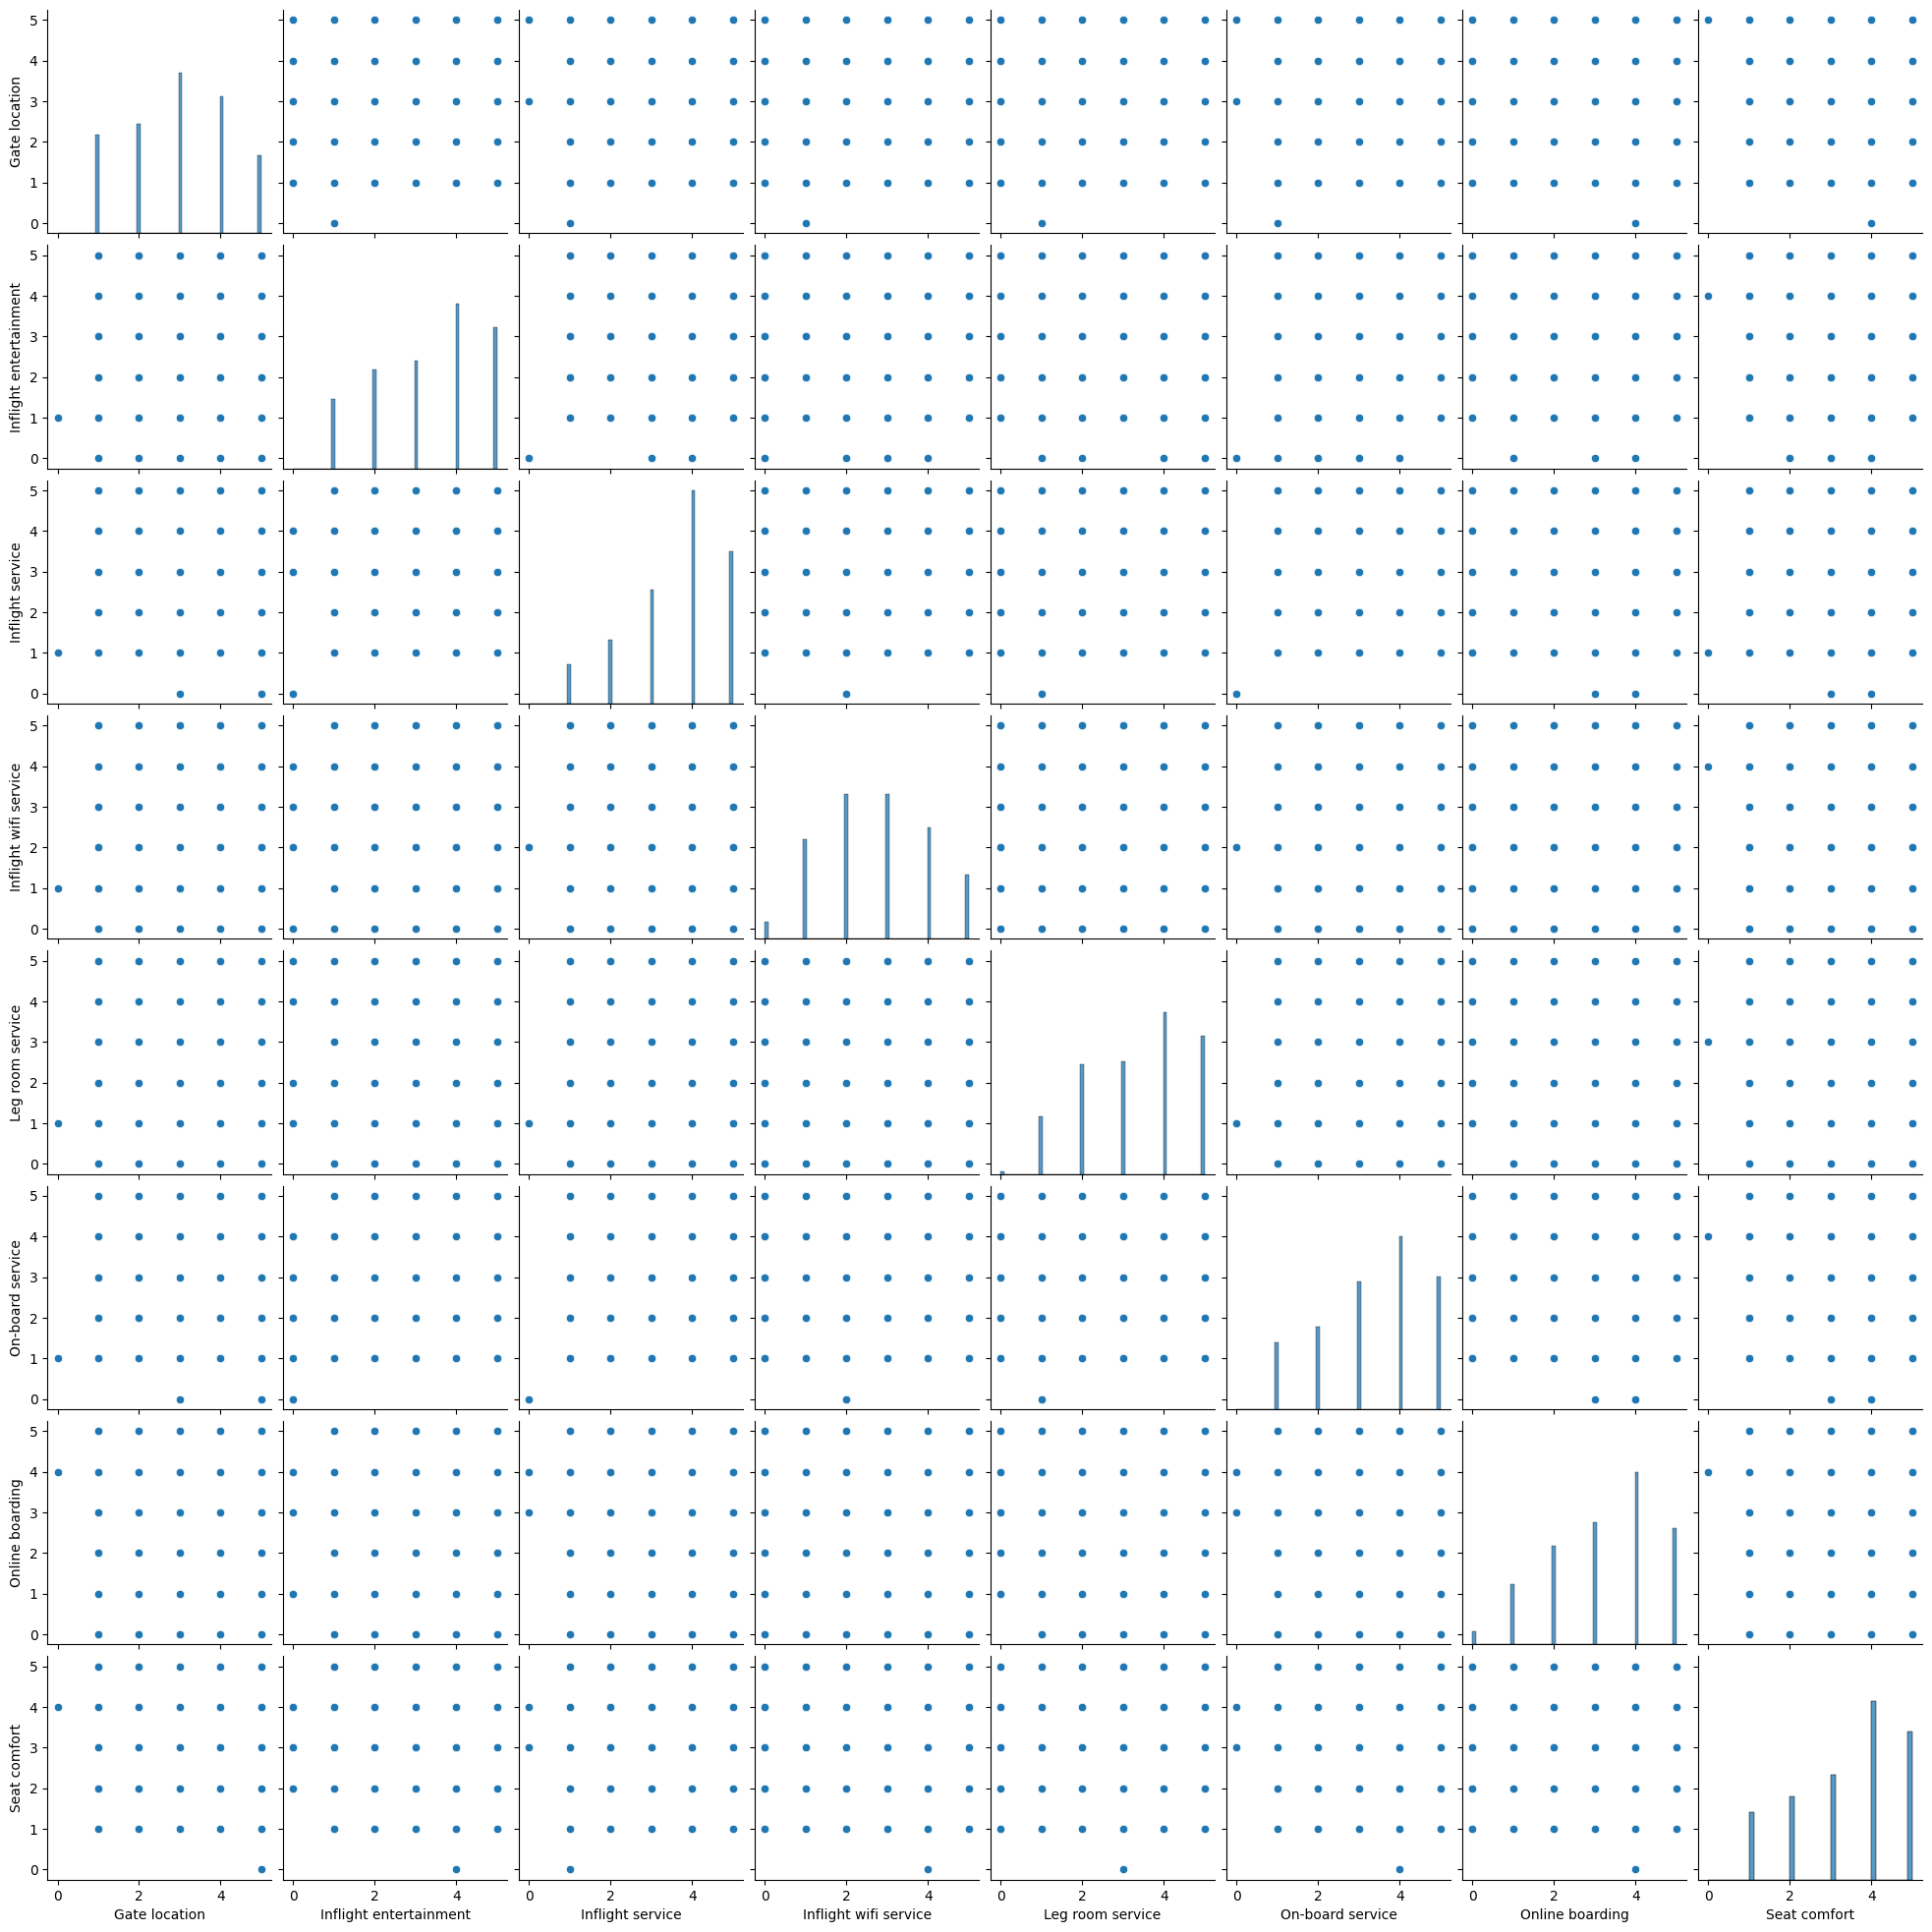

In [23]:
plt.figure(figsize=(25, 25))
sns.pairplot(train_data[numerical_features[10:]])
plt.show()


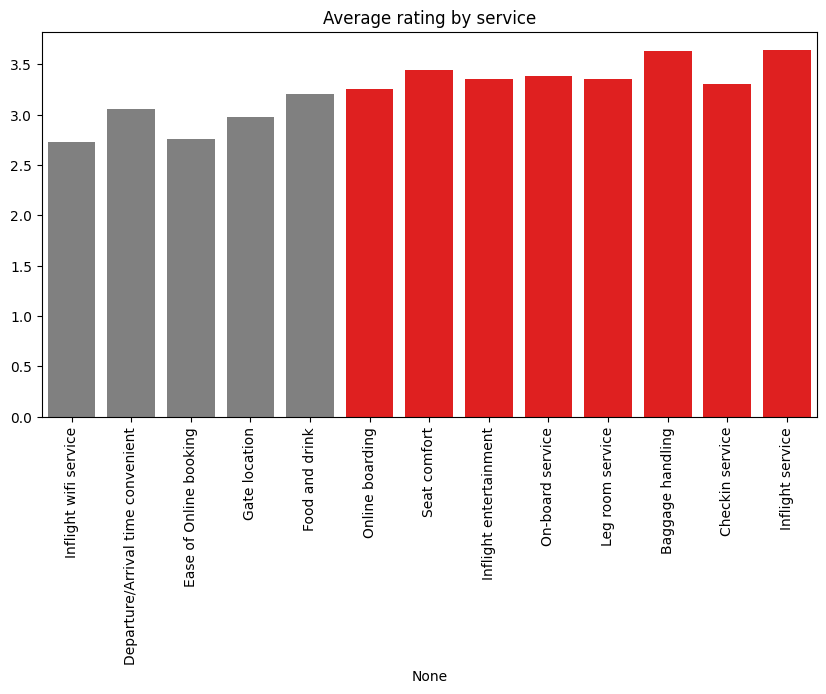

In [24]:
avg_rating_by_service = train_data.iloc[:, 7:20].mean(axis=0)
highlight_color = ['grey' if (x < avg_rating_by_service.mean()) else 'red' for x in avg_rating_by_service.values]

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating_by_service.index, y=avg_rating_by_service.values, palette=highlight_color)
plt.xticks(rotation=90)
plt.title("Average rating by service")
plt.show()

In [25]:
avg_rating_by_service.round(2).sort_values(ascending=False).head()

Inflight service          3.64
Baggage handling          3.63
Seat comfort              3.44
On-board service          3.38
Inflight entertainment    3.36
dtype: float64

Kode di atas digunakan untuk menghitung nilai rata-rata dari 13 layanan yang diberikan oleh maskapai penerbangan. Dari hasil perhitungan tersebut, dilihat kembali layanan yang mendapatkan rating lebih tinggi dari nilai rata-rata keseluruhan.

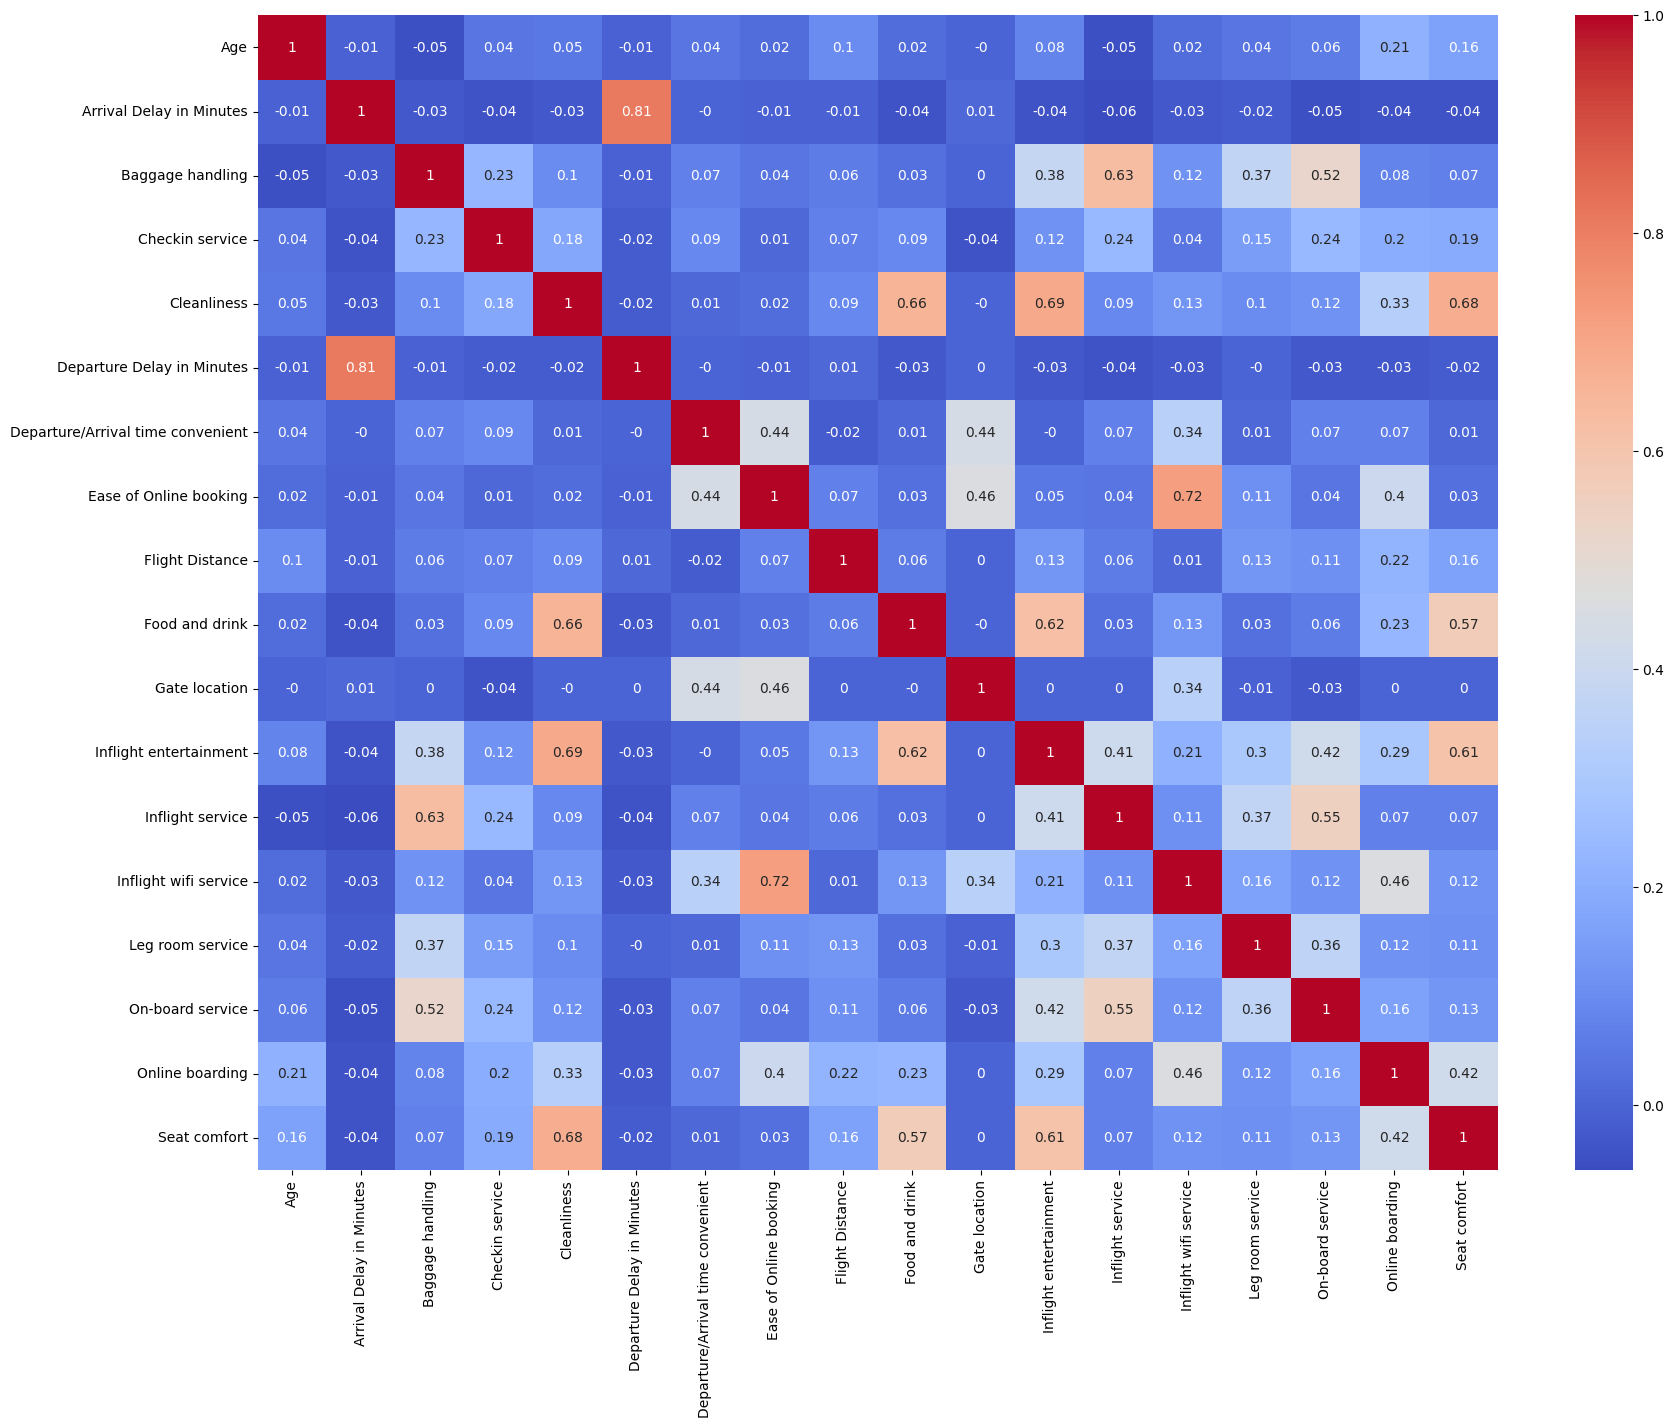

In [26]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_data[numerical_features].corr().round(2), annot=True, cmap='coolwarm')
plt.show()

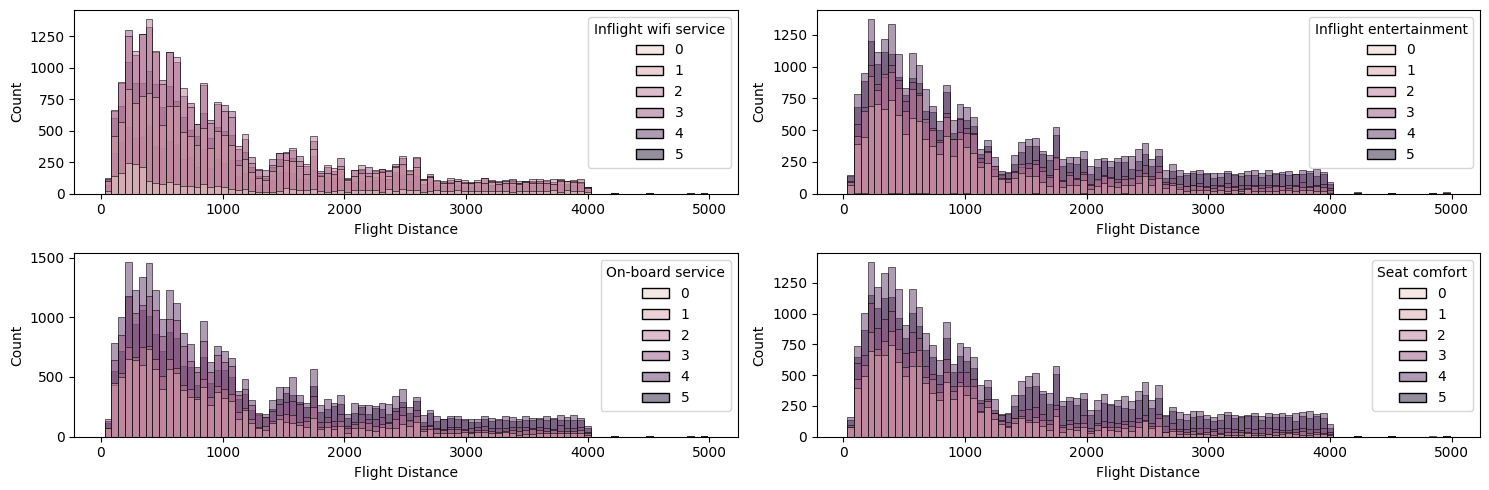

In [27]:
f, ax = plt.subplots(2, 2, figsize=(15, 5))
sns.histplot(data=train_data, x='Flight Distance', hue='Inflight wifi service', ax=ax[0, 0])
sns.histplot(data=train_data, x='Flight Distance', hue='Inflight entertainment', ax=ax[0, 1])
sns.histplot(data=train_data, x='Flight Distance', hue='On-board service', ax=ax[1, 0])
sns.histplot(data=train_data, x='Flight Distance', hue='Seat comfort', ax=ax[1, 1])
plt.tight_layout()
plt.show()

Dari diagram histogram di atas, terlihat bahwa layanan Seat Comfort dan Inflight Entertainment memiliki korelasi yang tinggi dengan kepuasan penumpang. Hal ini dapat dilihat dari distribusi data, dimana penumpang yang menempuh perjalanan dengan jarak yang jauh cenderung memberikan rating yang tinggi pada kedua layanan tersebut.

## Data Preparation

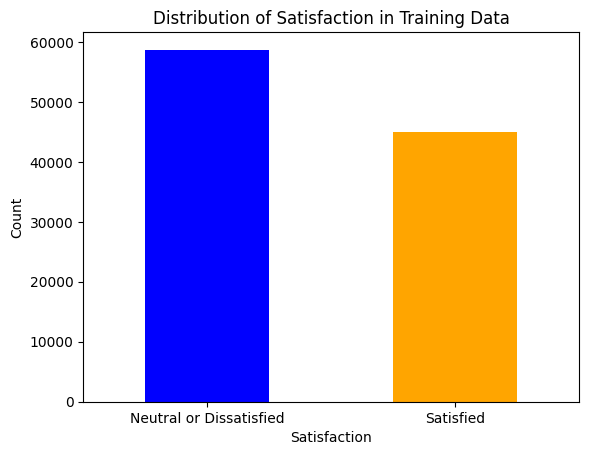

In [55]:
train_data['satisfaction'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Satisfaction in Training Data')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Neutral or Dissatisfied', 'Satisfied'], rotation=0)
plt.show()

Dari jumlah kelas pada kedua dataset, dapat dilihat terjadi ketidakseimbangan jumlah kelas. Hal ini dapat mempengaruhi performa model yang akan dibuat. Untuk menangani ketidakseimbangan kelas, dapat dilakukan oversampling atau undersampling. Pada kasus ini, akan dilakukan oversampling dengan menggunakan metode SMOTE. Sebelum melakukan oversampling, perlu dilakukan encoding pada kolom kategorikal.

In [53]:
dict_values= {}

for i, col in enumerate(categorical_features):
    dict_values[col] = train_data[col].unique()

dict_values

{'Gender': array(['Male', 'Female'], dtype=object),
 'Customer Type': array(['Loyal Customer', 'disloyal Customer'], dtype=object),
 'Type of Travel': array(['Personal Travel', 'Business travel'], dtype=object),
 'Class': array(['Eco Plus', 'Business', 'Eco'], dtype=object),
 'satisfaction': array(['neutral or dissatisfied', 'satisfied'], dtype=object)}

Sebelum melakukan pelatihan model, perlu dilakukan encoding pada kolom kategorikal. Pada kasus ini, akan digunakan metode Label Encoding dari library sklearn. Proses ini dilakukan pada kedua dataset. Menggunakan metode `copy()` untuk menghindari perubahan pada dataset asli.

In [30]:
le = LabelEncoder()
train_data_encoded = train_data.copy()
test_data_encoded = test_data.copy()

for i, feature in enumerate(categorical_features):
    train_data_encoded[feature] = le.fit_transform(train_data[feature])
    test_data_encoded[feature] = le.fit_transform(test_data[feature])


In [54]:
dict_values_encode = {}

for i, col in enumerate(categorical_features):
    dict_values_encode[col] = train_data_encoded[col].unique()

dict_values_encode

{'Gender': array([1, 0]),
 'Customer Type': array([0, 1]),
 'Type of Travel': array([1, 0]),
 'Class': array([2, 0, 1]),
 'satisfaction': array([0, 1])}

Kode di bawah ini digunakan untuk melakukan oversampling pada data train menggunakan metode SMOTE. Proses ini dilakukan untuk menangani ketidakseimbangan kelas pada data train. Pertama, melakukan import SMOTE dari library imblearn. Kemudian membagi data train menjadi features dan target. Selanjutnya, melakukan inisiasi SMOTE dan melakukan proses oversampling pada data train.

In [32]:
over_sample = SMOTE()

X = train_data_encoded.drop('satisfaction', axis=1)
y = train_data_encoded['satisfaction']

X, y = over_sample.fit_resample(X, y)

X = pd.DataFrame(X, columns=train_data_encoded.drop('satisfaction', axis=1).columns)
y = pd.Series(y)

train_data_encoded = pd.concat([X, y], axis=1)

satisfaction
0    58697
1    58697
Name: count, dtype: int64

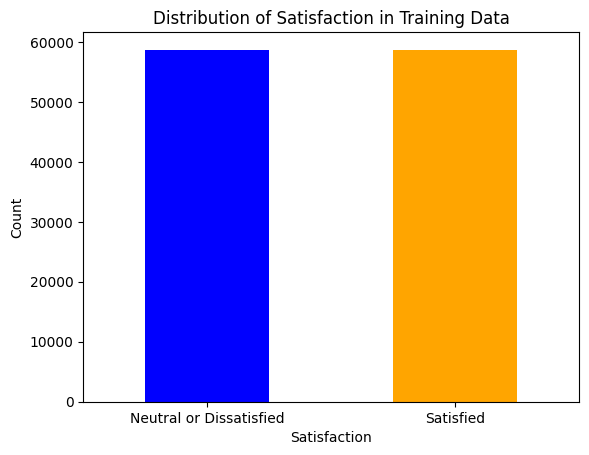

In [56]:
train_data_encoded["satisfaction"].value_counts().plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Satisfaction in Training Data")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Neutral or Dissatisfied", "Satisfied"], rotation=0)
plt.show()

In [33]:
data_train_proportion = train_data_encoded.shape[0] / (train_data_encoded.shape[0] + test_data_encoded.shape[0])
data_test_proportion = test_data_encoded.shape[0] / (train_data_encoded.shape[0] + test_data_encoded.shape[0])

print("Proportion of data train: ", round(data_train_proportion,3))
print("Proportion of data test: ", round(data_test_proportion,3))


Proportion of data train:  0.819
Proportion of data test:  0.181


In [34]:
# Merge train and test data and split with 80:20 ratio
data = pd.concat([train_data_encoded, test_data_encoded], axis=0)
data.reset_index(drop=True, inplace=True)

X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memastikan data train dan test memiliki proporsi yang sama
train_proportion = X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])
test_proportion = X_test.shape[0] / (X_train.shape[0] + X_test.shape[0])

print("Proportion of train data: ", round(train_proportion, 3))
print("Proportion of test data: ", round(test_proportion, 3))

Proportion of train data:  0.8
Proportion of test data:  0.2


In [35]:
X_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
117762,105287,0,0,59,0,0,2869,5,5,5,...,4,5,5,5,5,5,5,3,0.000000,0.693147
33104,108523,0,0,56,0,0,3677,1,1,1,...,4,4,4,4,4,5,4,4,0.000000,0.000000
102940,17736,0,0,36,0,0,2550,3,3,3,...,5,5,5,5,5,3,5,5,1.791759,2.639057
18734,92127,1,0,56,1,1,1522,2,5,2,...,1,1,5,3,5,3,5,1,0.000000,0.000000
110699,50436,0,0,39,0,0,86,3,3,3,...,4,5,5,5,3,4,5,2,0.000000,1.332200


In [36]:
X_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
82091,13548,0,0,44,0,1,106,2,5,5,...,3,2,2,2,2,2,2,4,0.000000,0.000000
36093,126434,1,0,29,1,2,631,1,2,0,...,4,4,3,4,4,2,3,4,4.584967,4.430817
31622,71424,0,0,47,0,0,867,2,2,2,...,4,5,5,5,5,4,5,4,0.000000,0.000000
120576,21555,0,0,43,0,2,306,4,1,1,...,2,4,4,4,4,5,4,3,2.302585,2.772589
82030,64110,1,0,42,0,0,2311,1,1,1,...,4,5,5,5,5,3,5,4,0.000000,0.000000


In [57]:
dict_model = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'CatBoost Classifier': CatBoostClassifier(verbose=0)
}

df_eval = pd.DataFrame(columns=['Accuracy Train', 'Accuracy Test', 'Precision Train', 'Precision Test'], index=dict_model.keys())

prediction_result = {}

for model_name, model in dict_model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred)

    prediction_result[model_name] = y_pred

    df_eval.loc[model_name] = [accuracy_train, accuracy_test, precision_train, precision_test]

,Accuracy Train,Accuracy Test,Precision Train,Precision Test
K-Nearest Neighbors,0.79698,0.697955,0.785365,0.689123
Random Forest Classifier,1.0,0.960639,1.0,0.97385
CatBoost Classifier,0.976062,0.965559,0.984257,0.976251


In [69]:
df_eval.reset_index(inplace=True)
df_eval.rename(columns={"index": "Model"}, inplace=True)
df_eval


,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test
0,K-Nearest Neighbors,0.79698,0.697955,0.785365,0.689123
1,Random Forest Classifier,1.0,0.960639,1.0,0.97385
2,CatBoost Classifier,0.976062,0.965559,0.984257,0.976251


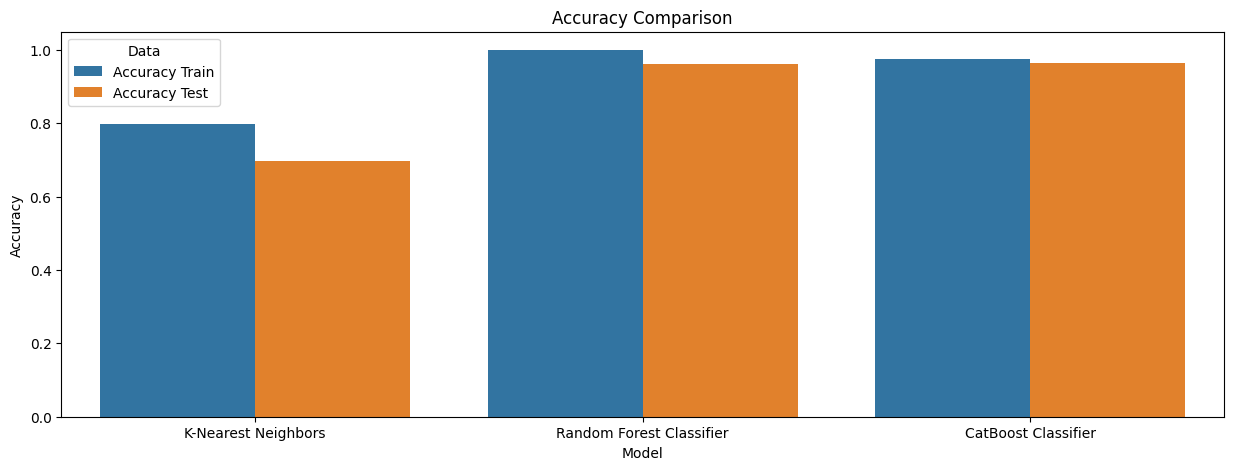

In [70]:
df_accuracy = df_eval[['Model', 'Accuracy Train', 'Accuracy Test']].melt(id_vars='Model', var_name='Data', value_name='Accuracy')
df_precision = df_eval[['Model', 'Precision Train', 'Precision Test']].melt(id_vars='Model', var_name='Data', value_name='Precision')

plt.figure(figsize=(15, 5))
sns.barplot(x='Model', y='Accuracy', hue='Data', data=df_accuracy)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


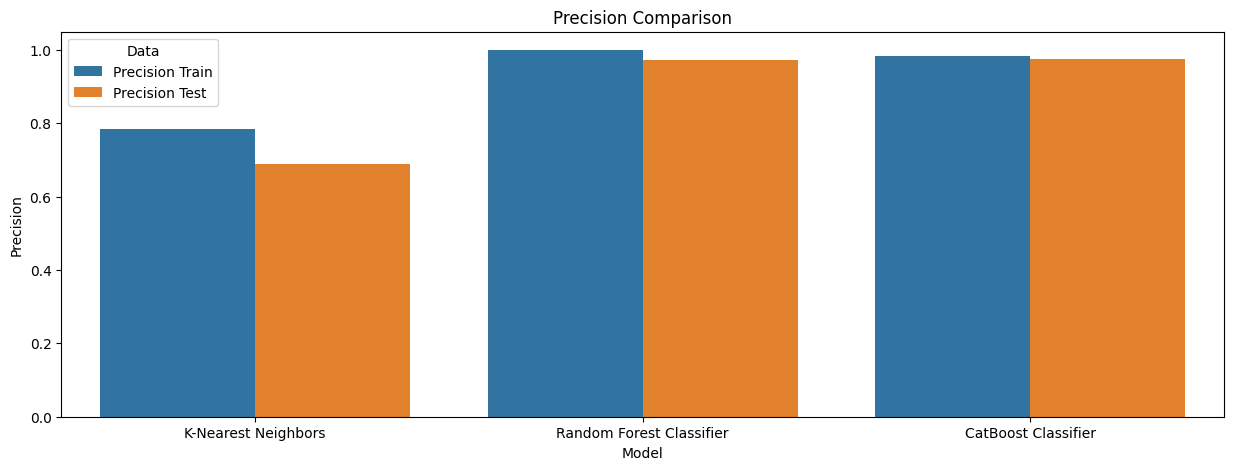

In [71]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Model', y='Precision', hue='Data', data=df_precision)
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.show()

In [72]:
for key, value in prediction_result.items():
    print(f"Classification Report {key}")
    print(classification_report(y_test, value))


Classification Report K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     14556
           1       0.69      0.70      0.70     14102

    accuracy                           0.70     28658
   macro avg       0.70      0.70      0.70     28658
weighted avg       0.70      0.70      0.70     28658

Classification Report Random Forest Classifier
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14556
           1       0.97      0.95      0.96     14102

    accuracy                           0.96     28658
   macro avg       0.96      0.96      0.96     28658
weighted avg       0.96      0.96      0.96     28658

Classification Report CatBoost Classifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14556
           1       0.98      0.95      0.96     14102

    accuracy                           0.97     286

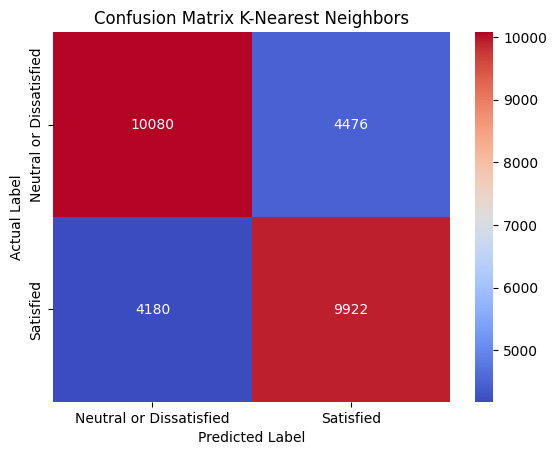

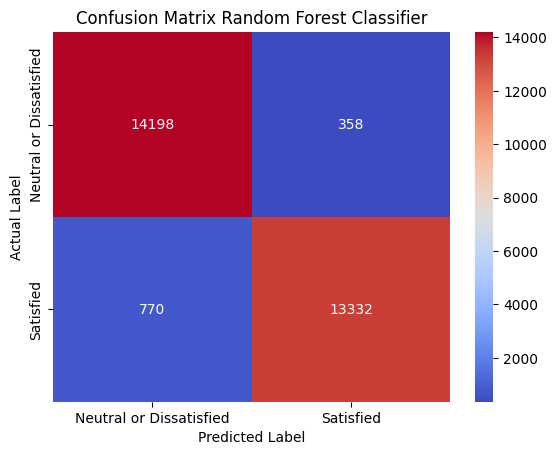

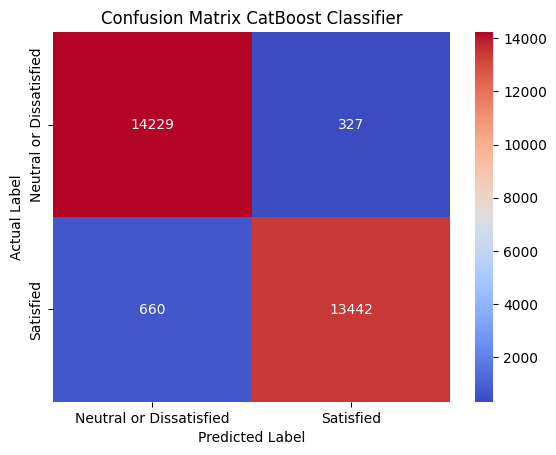

In [76]:
for key, value in prediction_result.items():
    matrix = confusion_matrix(y_test, value)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Neutral or Dissatisfied', 'Satisfied'], yticklabels=['Neutral or Dissatisfied', 'Satisfied'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(f"Confusion Matrix {key}")
    plt.show()
